In [1]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from crk87 import rk_error_control

In [2]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

def plot_shape_of_errors(continuous_sol, solution, name):
    minimum_step_size = 1e-5
    errors_small_steps = []
    plt.figure()
    for interp in continuous_sol.interps:
        num_points = 100
        pts_to_sample = create_t_eval(interp.x_i, interp.x_i_plus_1, num_points)
        errors = []
        for pt in pts_to_sample:
            y = solution([pt])[0]
            interp_eval = interp.eval(pt)
            errors.append( abs(interp_eval - y) )
        maximum_error = max(errors)
        plot_vals = [ error/ maximum_error for error in errors]
        #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
        x_axis = [i/(num_points - 1) for i in range(num_points)]

        if (interp.x_i_plus_1 - interp.x_i < minimum_step_size):
            errors_small_steps.append([x_axis, plot_vals])
            continue
        plt.plot(x_axis, plot_vals, label=f"x_{str(interp.x_i)}_{str(interp.x_i_plus_1)}")
    plt.title(f"{name} - plot of errors")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('error/(max_error on x_i to x_i_plus_1)')
    # plt.legend()
    plt.show()
    # ====================================== end figure of defect

    # ====================================== defects on small steps
    # plt.figure()
    # for [x_axis, plot_vals] in errors_small_steps:
    #     plt.plot(x_axis, plot_vals)
    # plt.title("plot of errors on small step sizes")
    # plt.xlabel("x_i to x_i_plus_1")
    # plt.ylabel('error/(max_error on x_i to x_i_plus_1)')
    # plt.show()

In [3]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol = 1e-5
    (   res, 
        crk8_continous_sol,
        crk7_continous_sol,
        hb8_continous_sol,
        hb10_continous_sol) = rk_error_control(model, t_span, y0[0], tol, solution)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp


    crk7_computed_solutions = [crk7_continous_sol.eval(x) for x in t_eval]
    crk8_computed_solutions = [crk8_continous_sol.eval(x) for x in t_eval]
    hb8_computed_solutions = [hb8_continous_sol.eval(x) for x in t_eval]
    hb10_computed_solutions = [hb10_continous_sol.eval(x) for x in t_eval]
    actual_solutions = solution(t_eval)

    # plt.figure()
    # for this_x in xs:
    #     plt.axvline(x=this_x) 
    # plt.plot(t_eval, crk7_computed_solutions, label="crk7")
    # plt.plot(t_eval, crk8_computed_solutions, label="crk8")
    # plt.plot(t_eval, hb8_computed_solutions, label="hb8")
    # plt.plot(t_eval, hb10_computed_solutions, label="hb10")
    # plt.plot(t_eval, actual_solutions, label="solution")
    # plt.title("solution vs interpolants")
    # plt.xlabel("t")
    # plt.ylabel('y')
    # plt.legend(loc="upper right")
    # plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    crk7_error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(crk7_computed_solutions, actual_solutions)]
    crk8_error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(crk8_computed_solutions, actual_solutions)]
    hb8_error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(hb8_computed_solutions, actual_solutions)]
    hb10_error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(hb10_computed_solutions, actual_solutions)]
    # for this_x in xs:
    #     plt.axvline(x=this_x) 
    plt.plot(t_eval, crk7_error, label="crk7 error")
    plt.plot(t_eval, crk8_error, label="crk8 error")
    plt.plot(t_eval, hb8_error, label="hb8 error")
    plt.plot(t_eval, hb10_error, label="hb10 error")
    # plt.title("global error")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    # plot_shape_of_errors(crk7_continous_sol, solution, "crk7")
    # plot_shape_of_errors(crk8_continous_sol, solution, "crk8")
    # plot_shape_of_errors(hb8_continous_sol , solution, "hb8")
    # plot_shape_of_errors(hb10_continous_sol , solution, "hb10")

    
    # ========================================================= end of steps error vs interpolant error
    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))

nsteps = 17
nsuccessful_steps = 17
integration complete


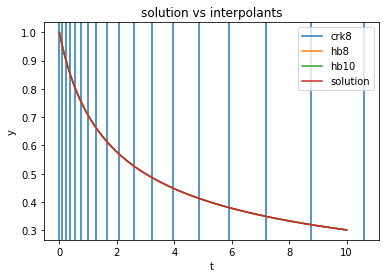

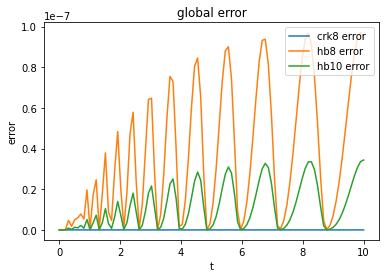

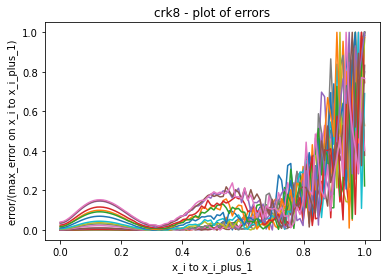

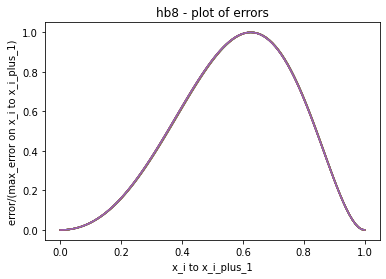

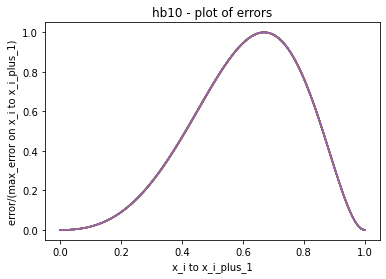

0.0
1.1102230246251565e-15
2.9976021664879227e-15
4.440892098500626e-15
7.882583474838611e-15
2.1094237467877974e-14
3.5638159090467525e-14
5.906386491005833e-14
9.181544413650045e-14
1.2789769243681803e-13
1.6542323066914832e-13
2.1144197503986106e-13
2.621791672652307e-13
3.159139616570883e-13
3.6359804056473877e-13
4.0811798385220754e-13
4.474198789239381e-13
4.762856775641922e-13


In [4]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

nsteps = 17
nsuccessful_steps = 17
integration complete


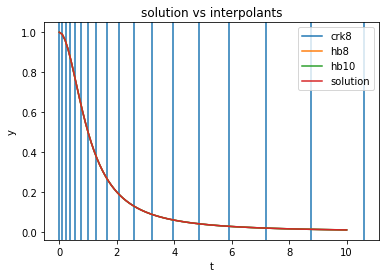

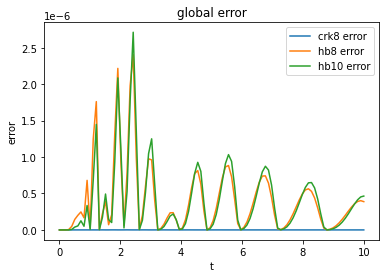

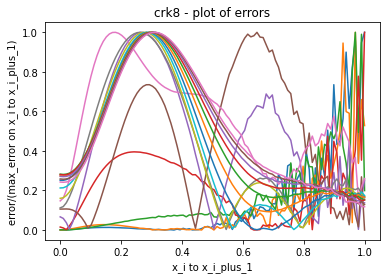

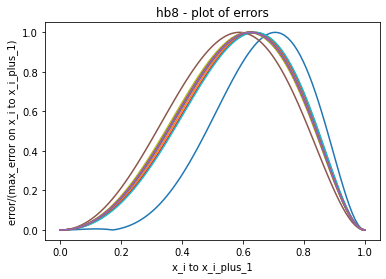

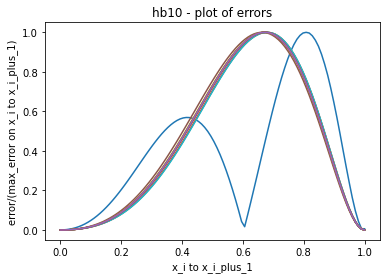

0.0
1.2212453270876722e-15
4.696243394164412e-14
1.092015367021304e-12
7.366551812992839e-12
1.855593456667748e-11
2.9054869621347734e-11
7.026090820261288e-11
1.4014311933152612e-10
1.7688539521998337e-10
1.6194015572956744e-10
1.2189695086650687e-10
8.179668747887447e-11
5.140603220876727e-11
3.117416741416079e-11
1.8579082716740913e-11
1.1003344069226983e-11
6.525151946545904e-12


In [5]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

nsteps = 17
nsuccessful_steps = 17
integration complete


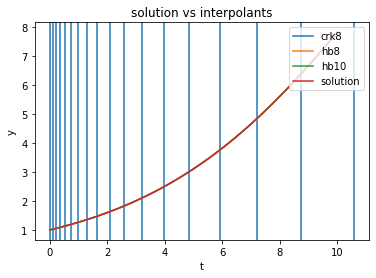

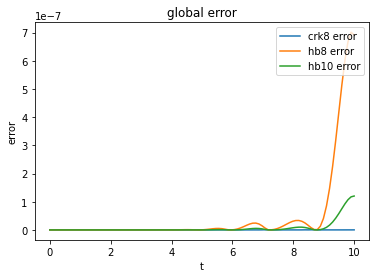

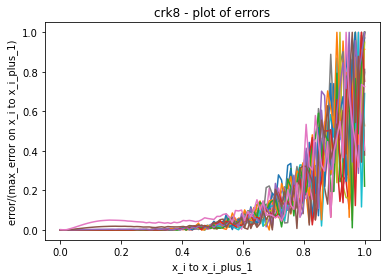

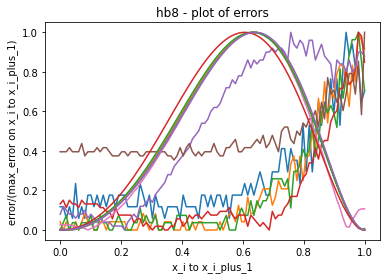

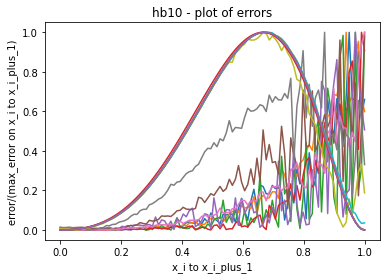

0.0
0.0
4.440892098500626e-16
2.220446049250313e-16
0.0
1.5543122344752192e-15
8.881784197001252e-16
4.218847493575595e-15
4.440892098500626e-15
9.992007221626409e-15
1.1546319456101628e-14
6.661338147750939e-15
3.108624468950438e-14
2.531308496145357e-14
4.796163466380676e-14
2.708944180085382e-13
2.5295321393059567e-12
1.0981437981172348e-11


In [6]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

nsteps = 263
nsuccessful_steps = 247
integration complete


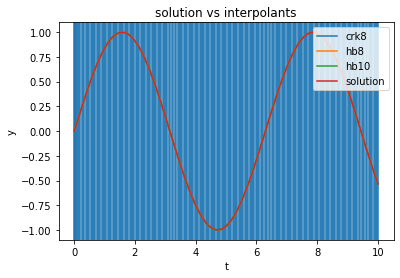

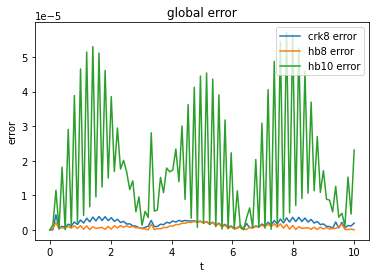

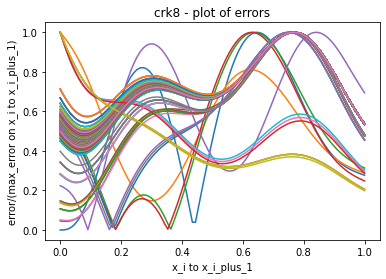

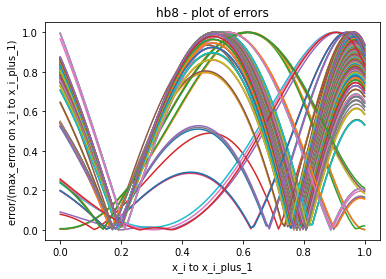

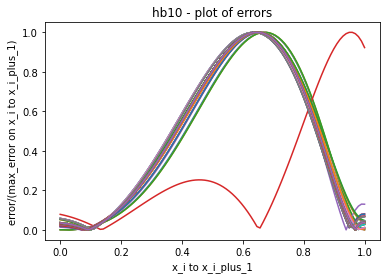

0.0
8.541325005780032e-08
2.458907998395543e-08
1.3799509777923102e-08
6.348585795956652e-09
1.9637976814146363e-08
2.288765232616452e-07
2.1113993510235574e-06
2.5679235431397274e-06
5.110081717774051e-07
5.922598090846165e-07
6.724903798827064e-07
7.516349803671218e-07
8.29565777848984e-07
9.061570264146113e-07
9.812848692503096e-07
1.054828207003311e-06
1.1266680696175868e-06
1.196688670934698e-06
1.2647767332341076e-06
1.3308223905106331e-06
1.3947189746454924e-06
1.4563633740083404e-06
1.515655899564372e-06
1.5725009279154989e-06
1.6268065804458942e-06
1.6784852560070007e-06
1.727453449840155e-06
1.7736320551131612e-06
1.8169465698658627e-06
1.8573269703336948e-06
1.8947080766551494e-06
1.9290295732998786e-06
1.960235992415349e-06
1.9882769334289563e-06
2.01310715730596e-06
2.03468650827876e-06
2.0529801609825427e-06
2.067958599916153e-06
2.079597608339867e-06
2.087878435585999e-06
2.0927876368537213e-06
2.0943173408838334e-06
2.092465047787151e-06
2.0872337834765275e-06
2.0786319

In [7]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

nsteps = 168
nsuccessful_steps = 104
integration complete


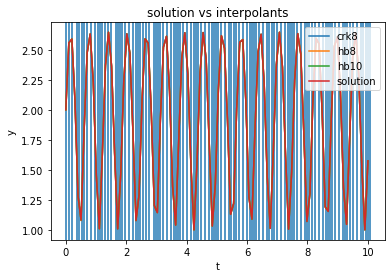

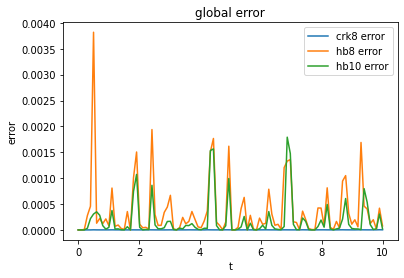

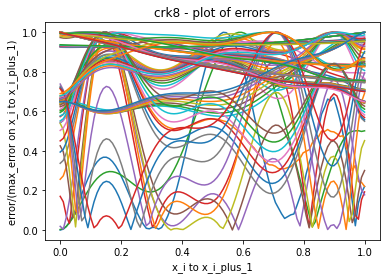

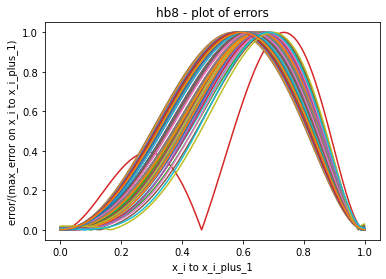

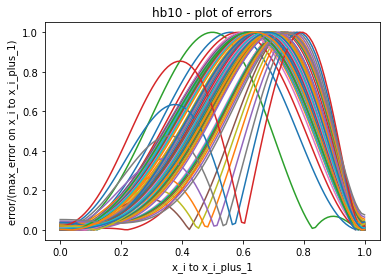

0.0
6.585492151600647e-10
4.713629486730042e-10
8.954412922257404e-08
1.0148270823684413e-07
9.702251655419047e-07
6.387804099006189e-07
4.840310579012908e-07
4.6961490873798084e-07
6.794044256075438e-07
1.0409697819291353e-06
1.3502396161158003e-06
1.0182382970125303e-06
7.24408051322456e-07
6.056890207162269e-07
6.548914921467031e-07
4.6194037950364475e-07
6.478629697159732e-07
1.0568226269658254e-06
6.939092975777328e-07
5.245914276308383e-07
5.078380129752702e-07
7.363499936463569e-07
1.1283172540732522e-06
1.4705471678144733e-06
1.1127163885849e-06
7.898397305083904e-07
6.590559618047109e-07
7.109885573619579e-07
5.953731176955301e-07
8.321481788087226e-07
1.1770132917199305e-06
7.707787548216771e-07
5.813128458598271e-07
5.615017815152612e-07
8.158167781324721e-07
1.2508739799521607e-06
1.6277747272308574e-06
1.2339453703269498e-06
8.738522518925151e-07
7.2767227221604e-07
7.832465604984407e-07
7.542673379212772e-07
1.053035267872815e-06
1.3286870770290449e-06
8.679713712211878e-

In [8]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

nsteps = 17
nsuccessful_steps = 17
integration complete


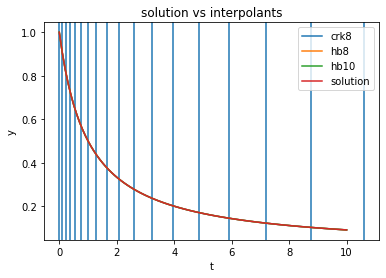

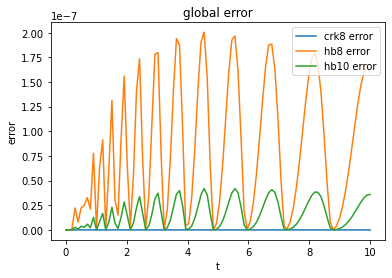

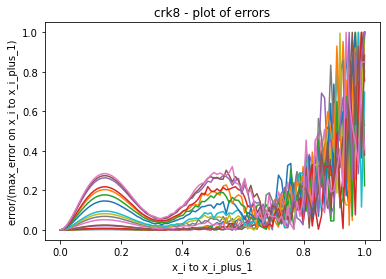

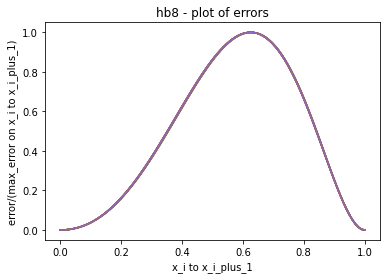

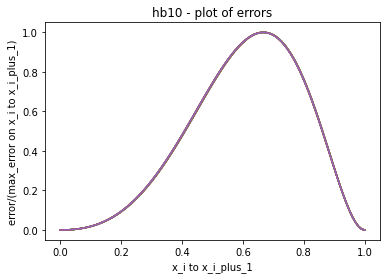

0.0
3.885780586188048e-15
6.661338147750939e-16
1.1102230246251565e-15
2.1094237467877974e-15
1.9984014443252818e-15
2.6645352591003757e-15
2.942091015256665e-15
2.1649348980190553e-15
5.551115123125783e-17
2.1094237467877974e-15
1.4155343563970746e-15
2.6645352591003757e-15
2.1094237467877974e-15
8.881784197001252e-16
7.91033905045424e-16
1.3877787807814457e-17
4.163336342344337e-16


In [9]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

nsteps = 17
nsuccessful_steps = 17
integration complete


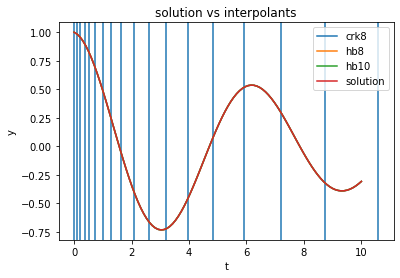

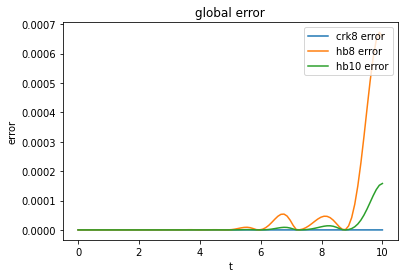

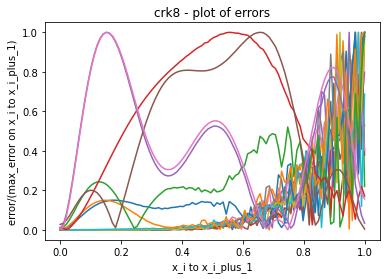

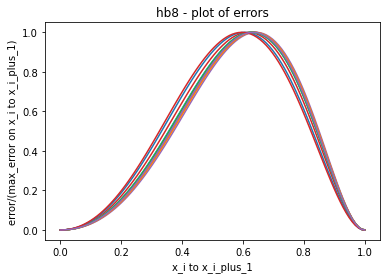

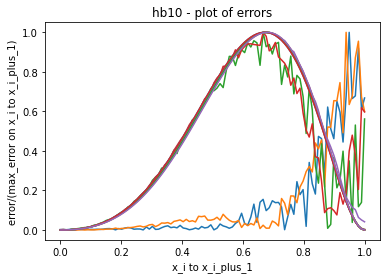

0.0
1.1102230246251565e-16
0.0
2.220446049250313e-16
1.1102230246251565e-16
1.3322676295501878e-15
1.1102230246251565e-15
3.524958103184872e-15
7.729927808952652e-15
5.551115123125783e-16
2.375877272697835e-14
2.601252546696742e-13
1.786792935831727e-12
6.157324650146734e-12
1.7234103033558767e-11
2.7465113516811357e-10
2.0566043312797433e-10
6.768435312221044e-09


In [10]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

nsteps = 17
nsuccessful_steps = 17
integration complete


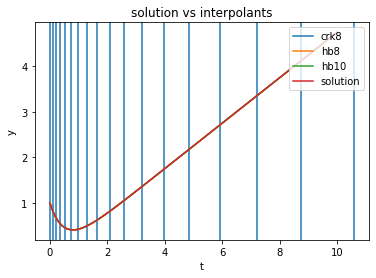

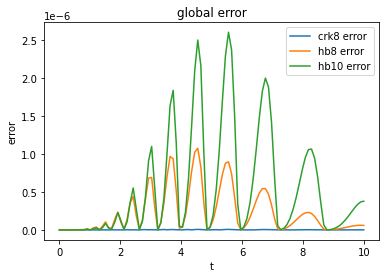

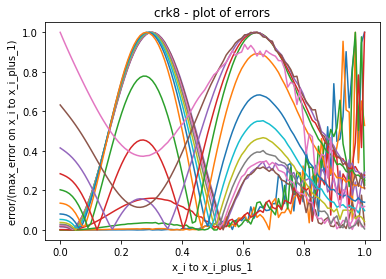

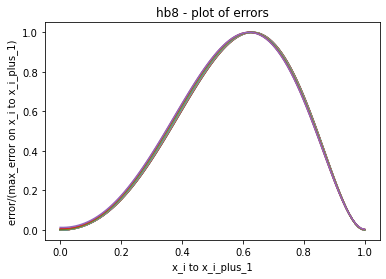

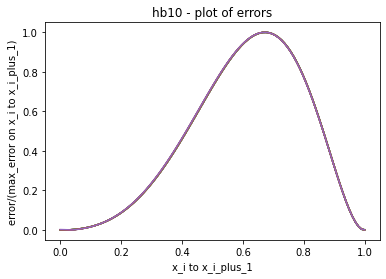

0.0
1.1102230246251565e-14
4.451994328746878e-14
1.0080825063596421e-13
4.2127412669401565e-13
1.65850666533629e-12
5.916045431320072e-12
1.9492574221402492e-11
5.88373794130348e-11
1.5988832480218207e-10
3.83346909771376e-10
7.918228295267227e-10
1.3677392551869616e-09
1.902046964374904e-09
2.0305463976910687e-09
1.56497215186846e-09
8.075105029092811e-10
2.4930635333930695e-10


In [11]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [12]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

t_span_8 = [0, 10]
eps = 0.1
a = exp(-1/eps)
y0_8 = [1, a/(eps*(-1+a))]

def model8(t, y):
    return [y[1], y[0]/eps]

def solution8(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [(1-exp(x/eps)*a)/(1-a) for x in t]

experiment(model8, y0_8, t_span_8, solution8)

## the results were extremely bad. So i wanted to see the solution
plt.figure()
plt.plot(t_span_8, solution8(t_span_8))



TypeError: 'int' object is not subscriptable

In [ ]:
# Jeff cash test set second one
t_span_9 = [0, 10]
eps = 0.1
y0_9 = [1, -1/sqrt(eps)]

def model9(t, y):
    return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

def solution9(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [exp(-x/sqrt(eps)) for x in t]

experiment(model9, y0_9, t_span_9, solution9)

In [ ]:
# Wolfram Alpha first problem

t_span_10 = [0, 10]
y0_10 = [1, 2]

def model10(t, y):
    return [y[1], -3*y[0] + 2*cos(4*t)]

def solution10(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    s = sqrt(3)
    return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

experiment(model10, y0_10, t_span_10, solution10)